In [ ]:
####################################################
# Python Program                                   #
#                                                  #
# Name: Joseph Forde                               #
# Student ID Number: T00215428                     #
# Data Analytics                                   #
# Research Survey                                  #
# https://github.com/forde1909/MTU/Project         #
# Data set:- Survey.xlsx                           #
#                                                  #
# Date 07-07-2025                                  #
####################################################

Python Version been used

In [ ]:
!python --version

Python 3.11.13


# Artifact 1

# Survey & Interviews Dataset
                                   
Notebook also available at: https://github.com/forde1909/MTU

Data set: Survey.xlsx


### A. Import Python Modules and Dataset

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import svm
from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, precision_recall_fscore_support
from sklearn.linear_model import LogisticRegression
from sklearn import set_config

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

!pip install scikit-optimize

from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer

import pickle
import matplotlib.pyplot as plt
%matplotlib inline

#### Load the dataset

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd

# Basic usage:
df = pd.read_excel('/content/gdrive/MyDrive/MTU/csvdata/Survey.xlsx')


# B. EDA - Exploratory Data Analysis

---



In [ ]:

# Reload the Excel file
file_path = '/content/gdrive/MyDrive/MTU/csvdata/Survey.xlsx'
excel_file = pd.ExcelFile(file_path)

# Display sheet names
excel_file.sheet_names


['Section 1  General Information',
 'Section 2  Official Technology ',
 'Section 3  Use of Additional or',
 'Section 4  Cybersecurity and Ri',
 'Section 5  Ransomware and Phish',
 'Section 6  Real-World Case Awar',
 'Section 7  Data Protection and ',
 'Section 8  Support, Culture & I',
 'Section 9  Final Comments']

# Section 1 – General Information
*Q1, Q2 and Q3*

In [ ]:
import pandas as pd

# 1. Define path and load Section 1
file_path = '/content/gdrive/MyDrive/MTU/csvdata/Survey.xlsx'
df = pd.read_excel(file_path, sheet_name='Section 1  General Information')

# 2. Locate Section 1 block
start = df[df.iloc[:,0].astype(str).str.contains('Section 1', na=False)].index[0]
end_mask = df.iloc[:,0].astype(str).str.contains('Section 2', na=False)
end = df[end_mask].index[0] if end_mask.any() else len(df)
sec1 = df.iloc[start+1:end].reset_index(drop=True)

# 3. Find where Q2 begins so we know Q1’s slice
q2 = sec1[sec1.iloc[:,0].astype(str).str.startswith('2.')].index[0]

# 4. Build Q1 table
q1_rows = sec1.iloc[1:q2]  # rows between the “1.” and “2.” markers
q1 = pd.DataFrame({
    'Job Role': q1_rows.iloc[:,1],
    'Count': q1_rows.iloc[:,2].astype(int)
})

# 5. Print the result
print("Section 1 – Q1: Current Job Role Distribution\n")
print(q1.to_string(index=False))


Section 1 – Q1: Current Job Role Distribution

                Job Role  Count
                      IT     95
                      OT     31
Cybersecurity Specialist     27
Manufacturing/Production     71
 Engineering/Maintenance     14
              Management     17
  Admin/Support Services     81
     Other: ____________     65
                   Total    401


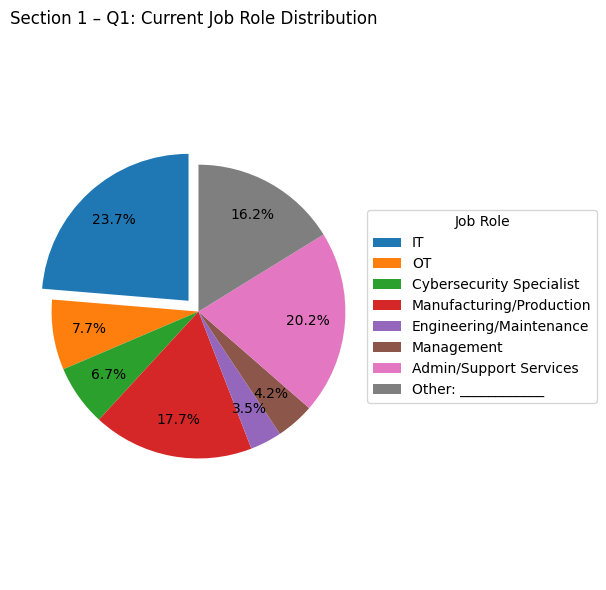

In [ ]:
#import pandas as pd
#import matplotlib.pyplot as plt


# Extract Section 1 block
start_idx = df[df.iloc[:, 0].astype(str).str.contains('Section 1', na=False)].index[0]
end_mask = df.iloc[:, 0].astype(str).str.contains('Section 2', na=False)
end_idx = df[end_mask].index[0] if end_mask.any() else len(df)
sec1 = df.iloc[start_idx+1:end_idx].reset_index(drop=True)

# Locate Question 2 start to isolate Q1 responses
q2_idx = sec1[sec1.iloc[:, 0].astype(str).str.startswith('2.')].index[0]

# Build Q1 data, excluding "Total"
q1_rows = sec1.iloc[1:q2_idx]
labels = q1_rows.iloc[:, 1].tolist()
sizes = q1_rows.iloc[:, 2].astype(int).tolist()

# Exclude Total
data = [(lab, cnt) for lab, cnt in zip(labels, sizes) if lab != 'Total']
labels_clean, sizes_clean = zip(*data)

# Highlight the largest slice
explode = [0.1 if cnt == max(sizes_clean) else 0 for cnt in sizes_clean]

# Create enhanced pie chart
plt.figure(figsize=(6,6))
plt.pie(sizes_clean, labels=None, startangle=90, autopct='%1.1f%%', explode=explode, pctdistance=0.75, labeldistance=1.1)
plt.legend(labels_clean, title='Job Role', loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Section 1 – Q1: Current Job Role Distribution')
plt.axis('equal')
plt.tight_layout()
plt.show()


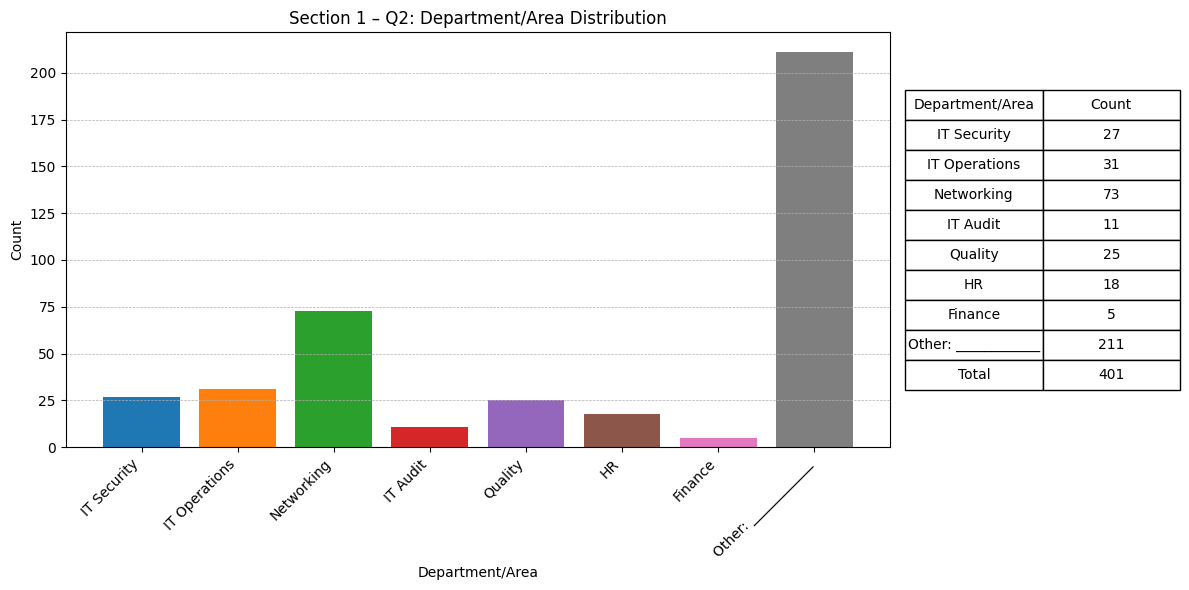

In [ ]:


# Extract Section 1 block
start_idx = df[df.iloc[:, 0].astype(str).str.contains('Section 1', na=False)].index[0]
end_mask = df.iloc[:, 0].astype(str).str.contains('Section 2', na=False)
end_idx = df[end_mask].index[0] if end_mask.any() else len(df)
sec1 = df.iloc[start_idx+1:end_idx].reset_index(drop=True)

# Locate Q2 and Q3 indices
q2_idx = sec1[sec1.iloc[:, 0].astype(str).str.startswith('2.')].index[0]
q3_idx = sec1[sec1.iloc[:, 0].astype(str).str.startswith('3.')].index[0]

# Build full Q2 DataFrame (including Total)
q2_rows = sec1.iloc[q2_idx+1:q3_idx]
q2_df = pd.DataFrame({
    'Department/Area': q2_rows.iloc[:, 1],
    'Count': q2_rows.iloc[:, 2].astype(int)
})

# Prepare bar chart data (exclude Total)
q2_plot = q2_df[q2_df['Department/Area'] != 'Total']
labels_plot = q2_plot['Department/Area']
counts_plot = q2_plot['Count']

# Create bar chart and table side by side without tick warnings
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), gridspec_kw={'width_ratios': [3, 1]})

# Bar chart
colors = plt.cm.tab10.colors[:len(q2_plot)]
x_positions = range(len(labels_plot))
ax1.bar(x_positions, counts_plot, color=colors)
ax1.set_xticks(x_positions)
ax1.set_xticklabels(labels_plot, rotation=45, ha='right')
ax1.set_title('Section 1 – Q2: Department/Area Distribution')
ax1.set_xlabel('Department/Area')
ax1.set_ylabel('Count')
ax1.grid(axis='y', linestyle='--', linewidth=0.5)

# Table
ax2.axis('off')
table = ax2.table(cellText=q2_df.values, colLabels=q2_df.columns, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

plt.tight_layout()
plt.show()


Section 1 – Q3: Age Group Distribution

       Age Group  Count
Less than 1 year     97
       1–5 years    201
      6–10 years     67
   Over 10 years     36


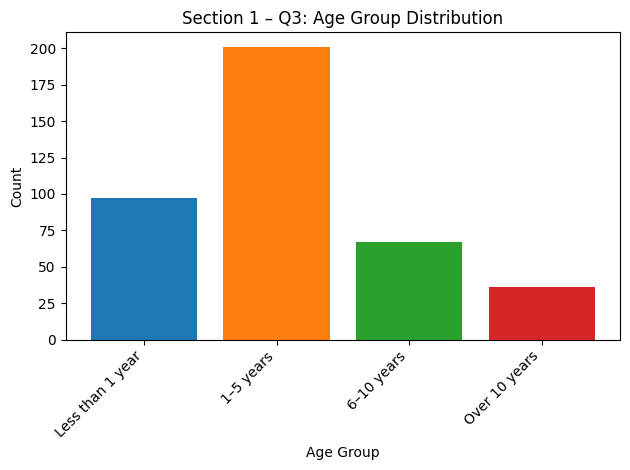

In [ ]:


# Extract Section 1 block
start_idx = df[df.iloc[:, 0].astype(str).str.contains('Section 1', na=False)].index[0]
end_mask = df.iloc[:, 0].astype(str).str.contains('Section 2', na=False)
end_idx = df[end_mask].index[0] if end_mask.any() else len(df)
sec1 = df.iloc[start_idx+1:end_idx].reset_index(drop=True)

# Locate Q3 ("3.") and Q4 ("4.") indices
q3_idx = sec1[sec1.iloc[:, 0].astype(str).str.startswith('3.')].index[0]
q4_mask = sec1.iloc[:, 0].astype(str).str.startswith('4.')
q4_idx = sec1[q4_mask].index[0] if q4_mask.any() else len(sec1)

# Extract Q3 responses and drop rows without counts
q3_rows = sec1.iloc[q3_idx+1:q4_idx]
q3_clean = q3_rows[q3_rows.iloc[:,2].notnull()]

age_labels = q3_clean.iloc[:, 1].tolist()
age_counts = q3_clean.iloc[:, 2].astype(int).tolist()

# Build DataFrame for Q3
q3_df = pd.DataFrame({
    'Age Group': age_labels,
    'Count': age_counts
})

# Display table
print("Section 1 – Q3: Age Group Distribution\n")
print(q3_df.to_string(index=False))

# Plot bar chart with distinct colours
plt.figure()
colors = plt.cm.tab10.colors[:len(q3_df)]
plt.bar(q3_df['Age Group'], q3_df['Count'], color=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Section 1 – Q3: Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


# Section 2 – Official Technology
*Q4, Q5, Q6 and Q7*

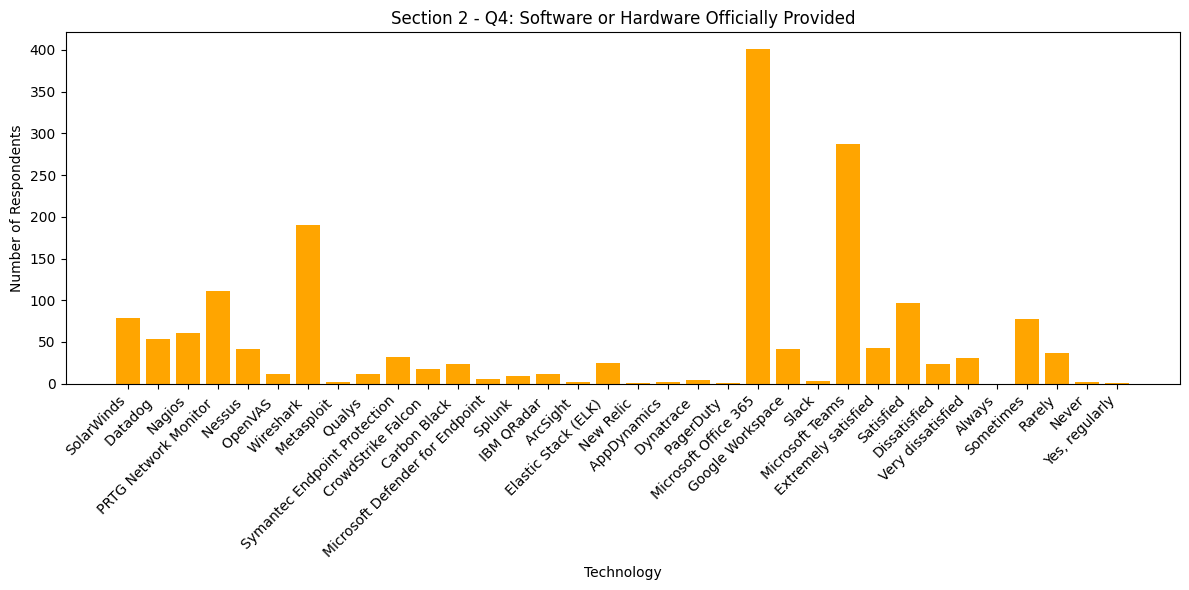

In [ ]:
# Generate the bar chart with orange colour for the bars
plt.figure(figsize=(12, 6))
plt.bar(filtered_q4['Technology'], filtered_q4['Count'], color='orange')
plt.title('Section 2 - Q4: Software or Hardware Officially Provided')
plt.xlabel('Technology')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




In [ ]:
# Sort the table by Count in descending order
sorted_q4 = filtered_q4.sort_values(by='Count', ascending=False).reset_index(drop=True)
sorted_q4


,Technology,Count
0,Microsoft Office 365,401
1,Microsoft Teams,287
2,Wireshark,190
3,PRTG Network Monitor,111
4,Satisfied,97
5,SolarWinds,79
6,Sometimes,78
7,Nagios,61
8,Datadog,54
9,Extremely satisfied,43


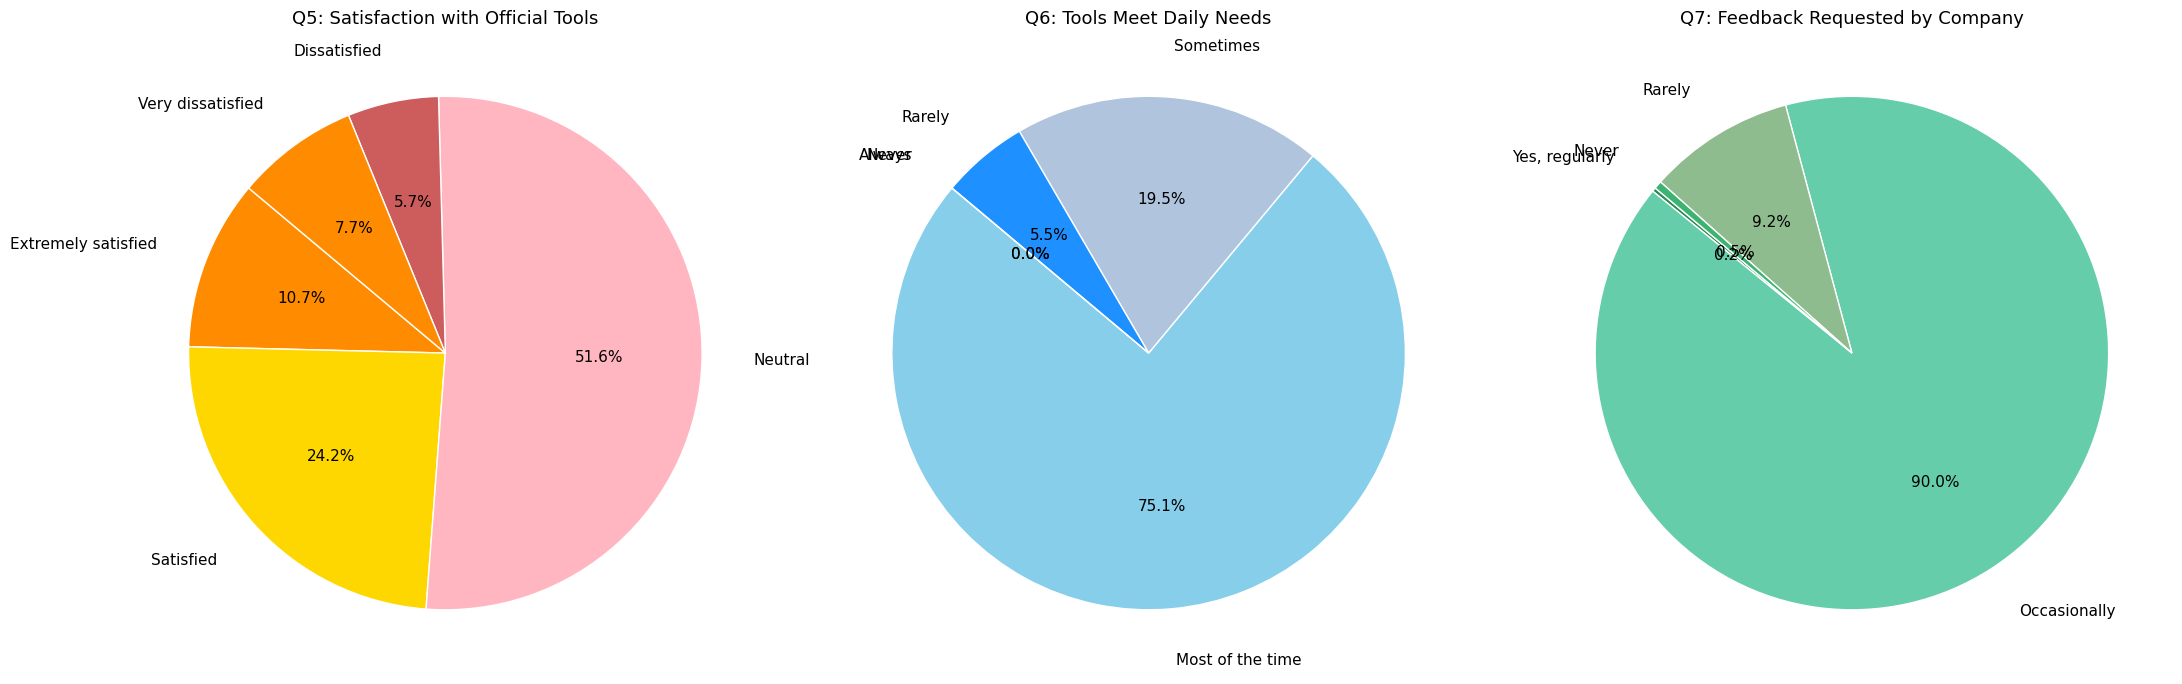

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file
file_path = '/content/gdrive/MyDrive/MTU/csvdata/Survey.xlsx'
excel_file = pd.ExcelFile(file_path)
df_sec2 = excel_file.parse('Section 2  Official Technology ')

# Clean and reset the DataFrame
df_sec2_cleaned = df_sec2.dropna(how='all')
df_sec2_cleaned.columns = df_sec2_cleaned.iloc[2]
df_sec2_cleaned = df_sec2_cleaned.drop(df_sec2_cleaned.index[:3]).reset_index(drop=True)

# Locate question blocks
q5_start = df_sec2_cleaned[df_sec2_cleaned.iloc[:, 0].astype(str).str.contains("5\.", na=False)].index[0]
q6_start = df_sec2_cleaned[df_sec2_cleaned.iloc[:, 0].astype(str).str.contains("6\.", na=False)].index[0]
q7_start = df_sec2_cleaned[df_sec2_cleaned.iloc[:, 0].astype(str).str.contains("7\.", na=False)].index[0]

try:
    q8_start = df_sec2_cleaned[df_sec2_cleaned.iloc[:, 0].astype(str).str.contains("8\.", na=False)].index[0]
except IndexError:
    q8_start = len(df_sec2_cleaned)

# Extract raw blocks
q5_data = df_sec2_cleaned.iloc[q5_start+1:q6_start].reset_index(drop=True)
q6_data = df_sec2_cleaned.iloc[q6_start+1:q7_start].reset_index(drop=True)
q7_data = df_sec2_cleaned.iloc[q7_start+1:q8_start].reset_index(drop=True)

# Cleaning function for Q5 and Q6
def clean_question_data(df):
    df_clean = df.dropna(how='all').dropna(axis=1, how='all')
    if df_clean.shape[1] >= 2:
        df_clean.columns = ['Response', 'Count']
        df_clean['Count'] = pd.to_numeric(df_clean['Count'], errors='coerce')
        df_clean = df_clean.dropna()
        return df_clean
    return None

# Cleaned responses
q5_df = clean_question_data(q5_data)
q6_df = clean_question_data(q6_data)

# Q7 requires special cleaning
q7_data_clean = q7_data.dropna(how='all').dropna(axis=1, how='all')
q7_data_clean.columns = ['Ignore', 'Response', 'Count']
q7_data_clean = q7_data_clean[['Response', 'Count']]
q7_data_clean['Count'] = pd.to_numeric(q7_data_clean['Count'], errors='coerce')
q7_data_clean = q7_data_clean.dropna()

# Define readable colour palettes
q5_colors = ['#FF8C00', '#FFD700', '#FFB6C1', '#CD5C5C']       # Oranges and pinks
q6_colors = ['#4682B4', '#87CEEB', '#B0C4DE', '#1E90FF']       # Blues
q7_colors = ['#2E8B57', '#66CDAA', '#8FBC8F', '#3CB371']       # Greens

# Plot the pie charts with spaced labels
fig, axes = plt.subplots(1, 3, figsize=(22, 7))

text_props = {'fontsize': 11, 'color': 'black'}
wedge_props = {'linewidth': 1, 'edgecolor': 'white'}

# Q5
axes[0].pie(
    q5_df['Count'],
    labels=q5_df['Response'],
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.2,
    colors=q5_colors,
    textprops=text_props,
    wedgeprops=wedge_props
)
axes[0].set_title('Q5: Satisfaction with Official Tools', fontsize=13)

# Q6
axes[1].pie(
    q6_df['Count'],
    labels=q6_df['Response'],
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.2,
    colors=q6_colors,
    textprops=text_props,
    wedgeprops=wedge_props
)
axes[1].set_title('Q6: Tools Meet Daily Needs', fontsize=13)

# Q7
axes[2].pie(
    q7_data_clean['Count'],
    labels=q7_data_clean['Response'],
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.2,
    colors=q7_colors,
    textprops=text_props,
    wedgeprops=wedge_props
)
axes[2].set_title('Q7: Feedback Requested by Company', fontsize=13)

plt.tight_layout()
plt.show()


In [ ]:
#import pandas as pd

# Define the raw response data
q5_data = {
    'Response': [
        'Extremely satisfied',
        'Satisfied',
        'Neutral',
        'Dissatisfied',
        'Very dissatisfied'
    ],
    'Count': [43, 97, 207, 23, 31]
}

q6_data = {
    'Response': [
        'Most of the time',
        'Sometimes',
        'Rarely',
        'Always',
        'Never'
    ],
    'Count': [301, 78, 22, 0, 0]
}

q7_data = {
    'Response': [
        'Occasionally',
        'Rarely',
        'Never',
        'Yes, regularly'
    ],
    'Count': [361, 37, 2, 1]
}

# Convert to DataFrames
q5_df = pd.DataFrame(q5_data)
q6_df = pd.DataFrame(q6_data)
q7_df = pd.DataFrame(q7_data)

# Function to calculate percentage
def add_percentage(df):
    df = df.copy()
    total = df['Count'].sum()
    df['Percentage'] = (df['Count'] / total * 100).round(1).astype(str) + '%'
    return df

# Apply percentage calculations
q5_summary = add_percentage(q5_df)
q6_summary = add_percentage(q6_df)
q7_summary = add_percentage(q7_df)

# Function to print a formatted table with a title and insight
def print_summary(title, df, insight):
    print(f"\n{'='*70}\n{title}\n{'='*70}")
    print(df.to_string(index=False))
    print(f"\n Insight: {insight}\n")

# Generate automated insights
q5_insight = (
    "Over half (51.6%) of respondents feel neutral about the tools provided. "
    "Only 34.9% report satisfaction, while 13.4% express dissatisfaction."
)

q6_insight = (
    "75.1% say the tools meet their needs most of the time. No one selected 'Always', "
    "indicating potential for improvement in consistency or reliability."
)

q7_insight = (
    "Only 0.2% report being regularly asked for feedback. Most (90%) say feedback is requested only occasionally."
)

# Display summaries
print_summary("Q5 – Satisfaction with Official Tools", q5_summary, q5_insight)
print_summary("Q6 – Do the Tools Meet Daily Work Needs?", q6_summary, q6_insight)
print_summary("Q7 – Has the Company Asked for Feedback?", q7_summary, q7_insight)



Q5 – Satisfaction with Official Tools
           Response  Count Percentage
Extremely satisfied     43      10.7%
          Satisfied     97      24.2%
            Neutral    207      51.6%
       Dissatisfied     23       5.7%
  Very dissatisfied     31       7.7%

 Insight: Over half (51.6%) of respondents feel neutral about the tools provided. Only 34.9% report satisfaction, while 13.4% express dissatisfaction.


Q6 – Do the Tools Meet Daily Work Needs?
        Response  Count Percentage
Most of the time    301      75.1%
       Sometimes     78      19.5%
          Rarely     22       5.5%
          Always      0       0.0%
           Never      0       0.0%

 Insight: 75.1% say the tools meet their needs most of the time. No one selected 'Always', indicating potential for improvement in consistency or reliability.


Q7 – Has the Company Asked for Feedback?
      Response  Count Percentage
  Occasionally    361      90.0%
        Rarely     37       9.2%
         Never      2     

# Microsoft Dominance
Microsoft Office 365 (401) and Microsoft Teams (287) are by far the most widely provided tools, indicating a strong reliance on the Microsoft ecosystem for communication and productivity.

*This is typical in enterprise and public sector environments where integration, security, and licensing management are prioritised.*

# High Use of Network Monitoring Tools

Wireshark (190) and PRTG Network Monitor (111) suggest that network monitoring and diagnostics are common practices, possibly reflecting mature IT or

# Cybersecurity operations.

SolarWinds (79) and Nagios (61) further reinforce this, showing a diverse set of network observability tools in use.
Security Tools Well Represented but Fragmented
Tools like Nessus (41), Symantec Endpoint Protection (32), CrowdStrike Falcon (17), Elastic Stack (25), and Microsoft Defender for Endpoint (6) show a wide range of endpoint protection and SIEM tools.
This fragmentation may imply multiple departments or business units selecting tools independently or transitioning between platforms.

# Advanced Tools Used Sparsely

Tools like Metasploit (2), ArcSight (2), AppDynamics (2), and PagerDuty (1) are rarely used. These may be reserved for specialist teams (e.g., penetration testing, advanced SOC/SIEM, or DevOps/observability).

# Hybrid Cloud Observability Emerging

Platforms like Datadog (54) and Dynatrace (4) indicate adoption of modern observability tooling for cloud-native or hybrid environments.



# Section 3 – Use of Additional or Unofficial Tool

*Q8, Q9, Q10, Q11, Q12, Q13,*

#Q8


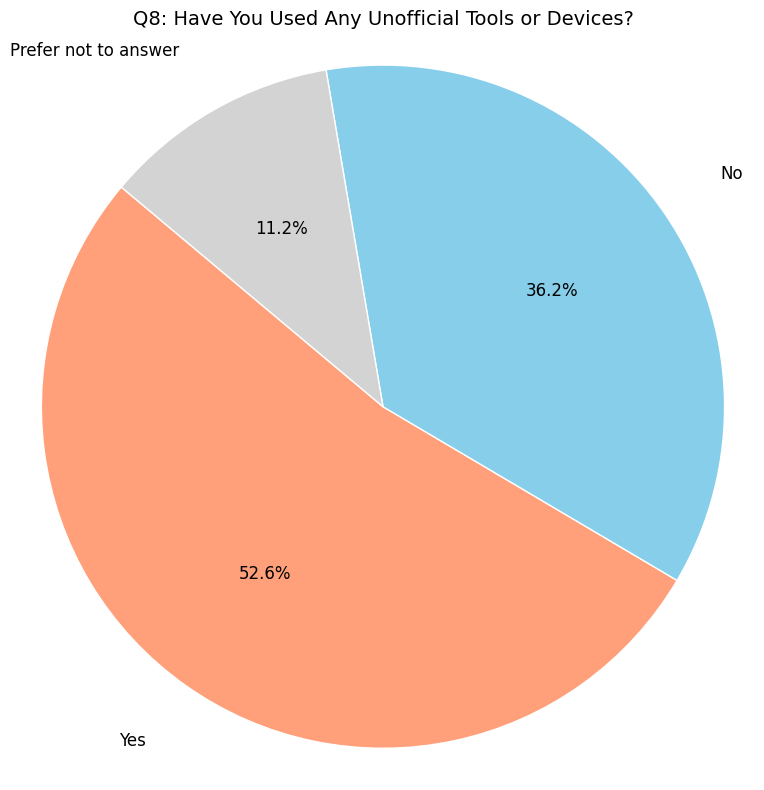

In [ ]:
# Q8
q8_data_fixed = pd.DataFrame({
    'Response': ['Yes', 'No', 'Prefer not to answer'],
    'Count': [211, 145, 45]
})

# Create a pie chart using the corrected data
plt.figure(figsize=(8, 8))
plt.pie(
    q8_data_fixed['Count'],
    labels=q8_data_fixed['Response'],
    autopct='%1.1f%%',
    startangle=140,
    labeldistance=1.2,
    colors=['#FFA07A', '#87CEEB', '#D3D3D3'],
    wedgeprops={'linewidth': 1, 'edgecolor': 'white'},
    textprops={'fontsize': 12}
)
plt.title('Q8: Have You Used Any Unofficial Tools or Devices?', fontsize=14)
plt.axis('equal')
plt.tight_layout()
plt.show()


#Q9

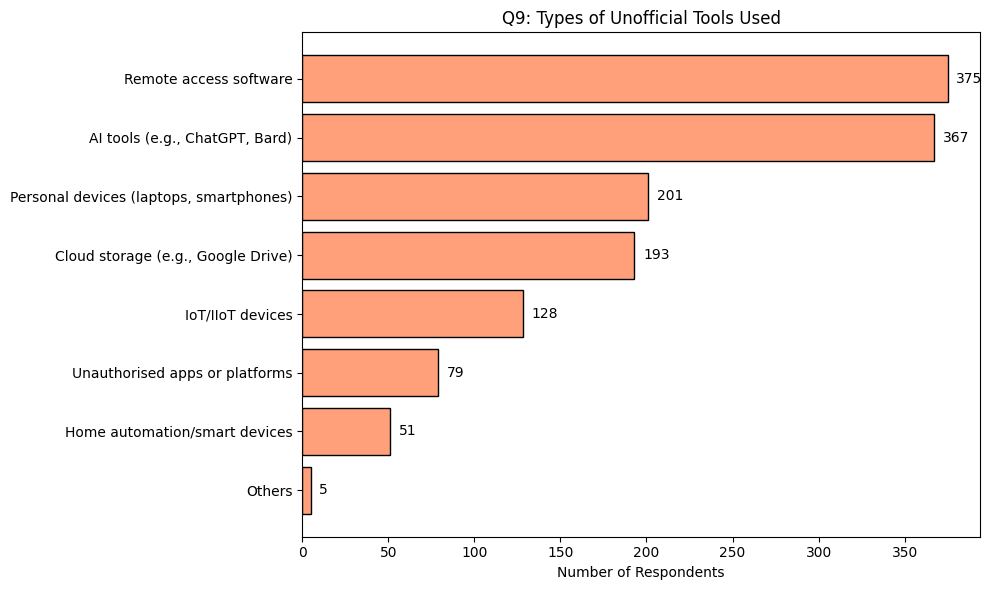

In [ ]:
# Q9 data using the original cleaned values from earlier
q9_data = pd.DataFrame({
    'Tool Type': [
        'Remote access software',
        'AI tools (e.g., ChatGPT, Bard)',
        'Personal devices (laptops, smartphones)',
        'Cloud storage (e.g., Google Drive)',
        'IoT/IIoT devices',
        'Unauthorised apps or platforms',
        'Home automation/smart devices',
        'Others'
    ],
    'Count': [375, 367, 201, 193, 128, 79, 51, 5]
})

# Sort and plot
q9_data_sorted = q9_data.sort_values(by='Count', ascending=False).reset_index(drop=True)

# Create horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(q9_data_sorted['Tool Type'], q9_data_sorted['Count'], color='#FFA07A', edgecolor='black')

# Add data labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=10)

# Format chart
plt.xlabel('Number of Respondents')
plt.title('Q9: Types of Unofficial Tools Used')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


#Q10, Q11 and Q12

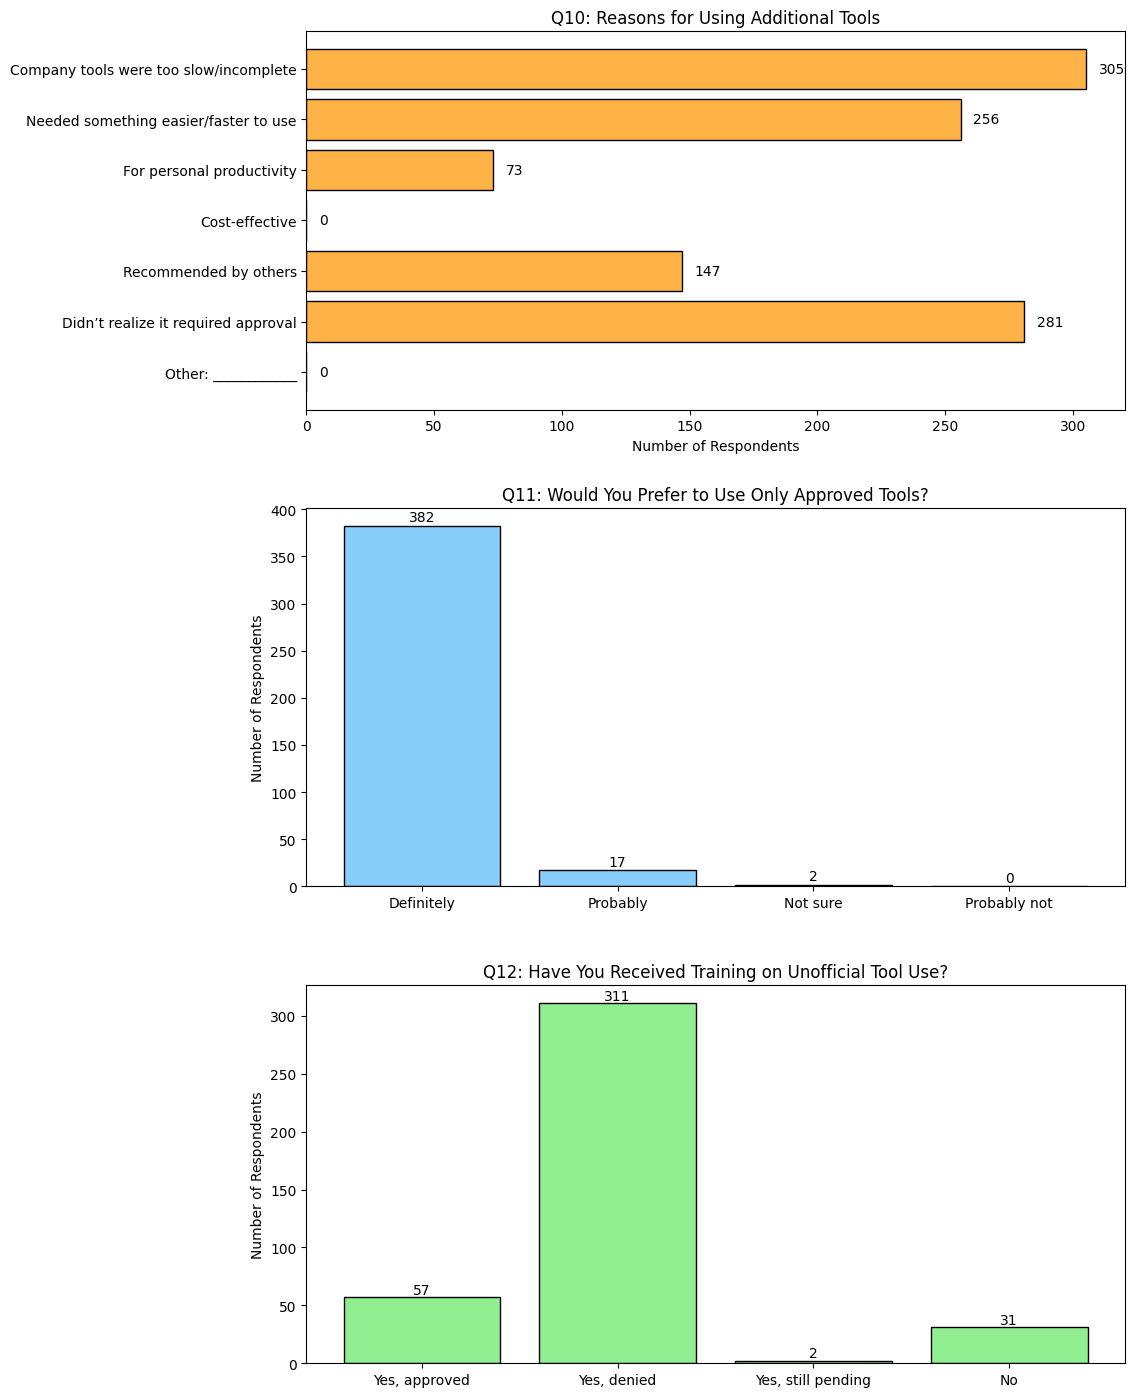

In [ ]:
# Q10 and Q11 data since variable context was lost

# Q10 data (rows 13–19)
q10_data = df_sec3_cleaned.iloc[13:20, [1, 2]].copy()
q10_data.columns = ['Reason', 'Count']
q10_data['Count'] = pd.to_numeric(q10_data['Count'], errors='coerce')
q10_data = q10_data.dropna()

# Q11 data (rows 21–24)
q11_data = df_sec3_cleaned.iloc[21:25, [1, 2]].copy()
q11_data.columns = ['Response', 'Count']
q11_data['Count'] = pd.to_numeric(q11_data['Count'], errors='coerce')
q11_data = q11_data.dropna()

# Replot all bar charts together: Q10, Q11, Q12
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

# Q10
axes[0].barh(q10_data['Reason'], q10_data['Count'], color='#FFB347', edgecolor='black')
axes[0].set_title('Q10: Reasons for Using Additional Tools')
axes[0].set_xlabel('Number of Respondents')
axes[0].invert_yaxis()
for i, v in enumerate(q10_data['Count']):
    axes[0].text(v + 5, i, str(int(v)), va='center', fontsize=10)

# Q11
axes[1].bar(q11_data['Response'], q11_data['Count'], color='#87CEFA', edgecolor='black')
axes[1].set_title('Q11: Would You Prefer to Use Only Approved Tools?')
axes[1].set_ylabel('Number of Respondents')
for i, v in enumerate(q11_data['Count']):
    axes[1].text(i, v + 5, str(int(v)), ha='center', fontsize=10)

# Q12 (already reloaded earlier)
axes[2].bar(q12_data['Response'], q12_data['Count'], color='#90EE90', edgecolor='black')
axes[2].set_title('Q12: Have You Received Training on Unofficial Tool Use?')
axes[2].set_ylabel('Number of Respondents')
for i, v in enumerate(q12_data['Count']):
    axes[2].text(i, v + 3, str(int(v)), ha='center', fontsize=10)

plt.show()


#Q13

In [ ]:
#import pandas as pd

# Load the Excel file and relevant sheet
file_path = '/content/gdrive/MyDrive/MTU/csvdata/Survey.xlsx'
section3 = pd.read_excel(file_path, sheet_name='Section 3  Use of Additional or')

# Extract Q13 tool table (assumes header is at row 41, data starts at 43)
q13_data = section3.iloc[43:, [1, 2, 3, 4, 5]]
q13_data.columns = ['Index', 'Tool', 'Domain', 'OT', 'Cyber Security']
q13_data = q13_data.reset_index(drop=True)

# Only keep rows with valid tool names
q13_tools = q13_data['Tool'].dropna().str.strip()
q13_tools = q13_tools[q13_tools != '']

# Mapping function for Shadow IT categories
def map_tool_to_category(tool):
    tool = tool.lower()
    if any(x in tool for x in ['dropbox', 'wetransfer', 'google drive', 'onedrive', 'mega', 'surveymonkey', 'google forms']):
        return 'Cloud Storage/File Transfer'
    elif any(x in tool for x in ['whatsapp', 'signal', 'discord', 'slack', 'teams', 'zoom']):
        return 'Messaging/Collaboration'
    elif any(x in tool for x in ['teamviewer', 'anydesk', 'chrome remote desktop', 'logmein', 'vnc viewer']):
        return 'Remote Access'
    elif any(x in tool for x in ['usb', 'laptop', 'tablet', 'phone', 'router', 'raspberry pi', 'arduino', 'unmanaged switch', 'printer', 'scanner']):
        return 'Hardware/Personal Devices'
    elif any(x in tool for x in ['visual studio', 'jupyter', 'postman', 'github', 'angry ip scanner']):
        return 'Development/Testing'
    elif any(x in tool for x in ['wireshark', 'nmap', 'tor browser']):
        return 'Cybersecurity/Network Tool'
    else:
        return 'Other'

# Apply mapping
tool_category_map = q13_tools.apply(map_tool_to_category)

# Count frequency by category
category_counts = tool_category_map.value_counts().reset_index()
category_counts.columns = ['Category', 'Frequency']
print(category_counts)


                      Category  Frequency
0                        Other         17
1    Hardware/Personal Devices          8
2      Messaging/Collaboration          6
3  Cloud Storage/File Transfer          6
4                Remote Access          5
5          Development/Testing          4
6   Cybersecurity/Network Tool          4


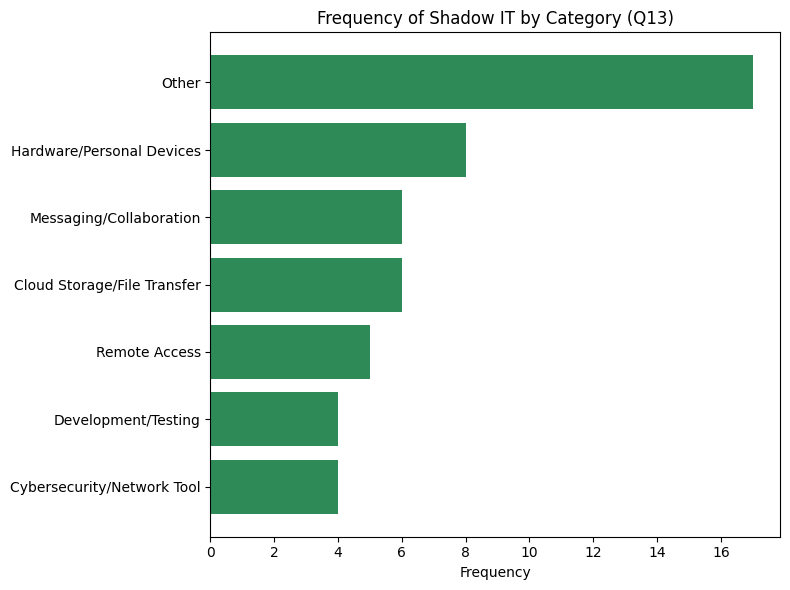

In [ ]:
# Mapping function for Shadow IT categories

#import matplotlib.pyplot as plt


def map_tool_to_category(tool):
    tool = tool.lower()
    if any(x in tool for x in ['dropbox', 'wetransfer', 'google drive', 'onedrive', 'mega', 'surveymonkey', 'google forms']):
        return 'Cloud Storage/File Transfer'
    elif any(x in tool for x in ['whatsapp', 'signal', 'discord', 'slack', 'teams', 'zoom']):
        return 'Messaging/Collaboration'
    elif any(x in tool for x in ['teamviewer', 'anydesk', 'chrome remote desktop', 'logmein', 'vnc viewer']):
        return 'Remote Access'
    elif any(x in tool for x in ['usb', 'laptop', 'tablet', 'phone', 'router', 'raspberry pi', 'arduino', 'unmanaged switch', 'printer', 'scanner']):
        return 'Hardware/Personal Devices'
    elif any(x in tool for x in ['visual studio', 'jupyter', 'postman', 'github', 'angry ip scanner']):
        return 'Development/Testing'
    elif any(x in tool for x in ['wireshark', 'nmap', 'tor browser']):
        return 'Cybersecurity/Network Tool'
    else:
        return 'Other'

# Apply mapping
tool_category_map = q13_tools.apply(map_tool_to_category)

# Count frequency by category
category_counts = tool_category_map.value_counts().reset_index()
category_counts.columns = ['Category', 'Frequency']
category_counts


plt.figure(figsize=(8,6))
plt.barh(category_counts['Category'], category_counts['Frequency'], color='seagreen')
plt.xlabel('Frequency')
plt.title('Frequency of Shadow IT by Category (Q13)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#Findings:

Hardware/Personal Devices and Cloud Storage/File Transfer are the most common categories, followed by Messaging/Collaboration and Remote Access.

This approach highlights areas where Shadow IT is most prevalent, supporting risk-based policy and technical controls.

# Section 4 – Cybersecurity and Risk Awareness
#Q14, Q15, Q16, Q17.

Q14, Q15, Q16, Q17.

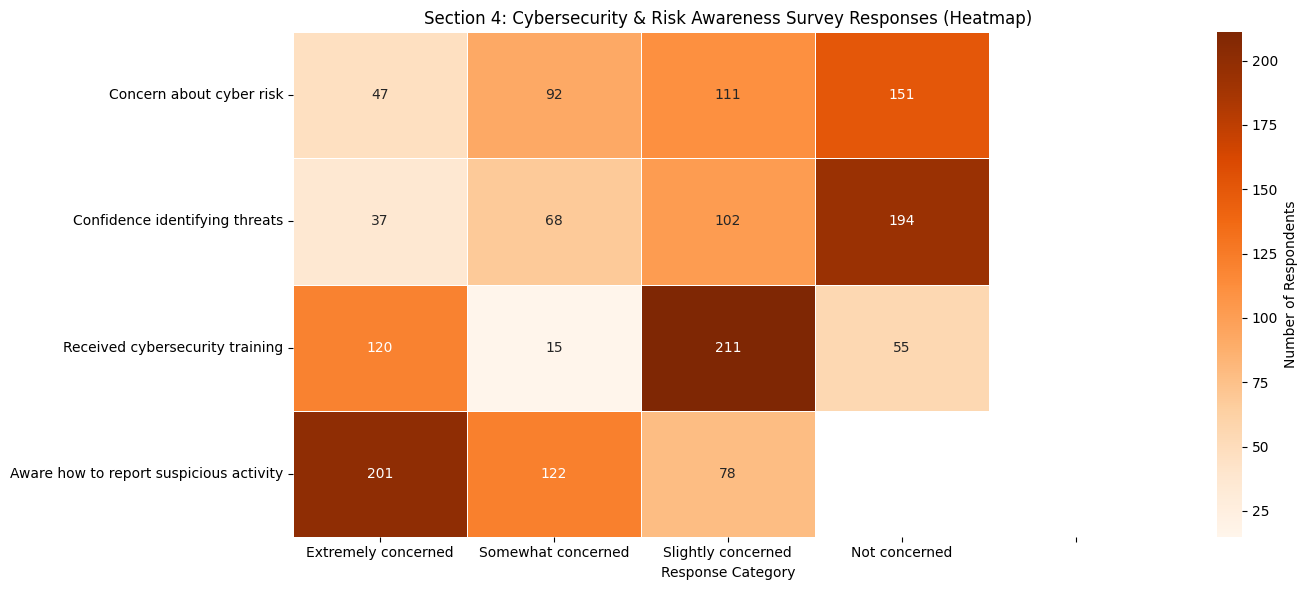

In [ ]:

# Data as previously structured
heatmap_data = pd.DataFrame([
    [47, 92, 111, 151, np.nan],        # Q14 Concern
    [37, 68, 102, 194, np.nan],        # Q15 Confidence
    [120, 15, 211, 55, np.nan],        # Q16 Training
    [201, 122, 78, np.nan, np.nan]     # Q17 Reporting
], index=[
    "Concern about cyber risk",
    "Confidence identifying threats",
    "Received cybersecurity training",
    "Aware how to report suspicious activity"
], columns=[
    "Option 1", "Option 2", "Option 3", "Option 4", "Option 5"
])

custom_col_labels = [
    "Extremely concerned", "Somewhat concerned", "Slightly concerned", "Not concerned", ""
]

plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    cmap="Oranges",         # <- Orange colour range
    linewidths=.5,
    cbar_kws={"label": "Number of Respondents"},
    yticklabels=heatmap_data.index,
    xticklabels=custom_col_labels
)
plt.title("Section 4: Cybersecurity & Risk Awareness Survey Responses (Heatmap)")
plt.ylabel("")
plt.xlabel("Response Category")
plt.tight_layout()
plt.show()


1. Most Staff Are Not Highly Concerned About Cybersecurity Risks
General apathy or lack of urgency about cybersecurity risks across the workforce, which increases the organisation’s exposure.

2. Confidence in Identifying Cyber Threats Is Low
There is a significant skills/awareness gap. Many staff lack the self-assessed ability to spot threats, which increases susceptibility to phishing and social engineering.

3. Formal Cybersecurity Training Is Rare
Most staff have not been formally trained in cybersecurity best practices, leaving the organisation vulnerable to both common and advanced threats.

4. Awareness of Reporting Procedures Is Mixed
While half know the process, a substantial minority do not. Incidents may go unreported due to lack of process awareness.

Visual ‘Hotspots’ in the Heatmap
The darkest cells (largest numbers) are:
o	“Not concerned” about cyber risk (151)
o	“Not confident” in identifying threats (194)
o	“No training” (211)
o	“Yes” to reporting is the largest for Q17 (201), but 122 are only “somewhat” aware, and 78 don’t know how to report.


# Section 5 – Ransomware and Phishing
# Q18, Q19, Q20 Q21

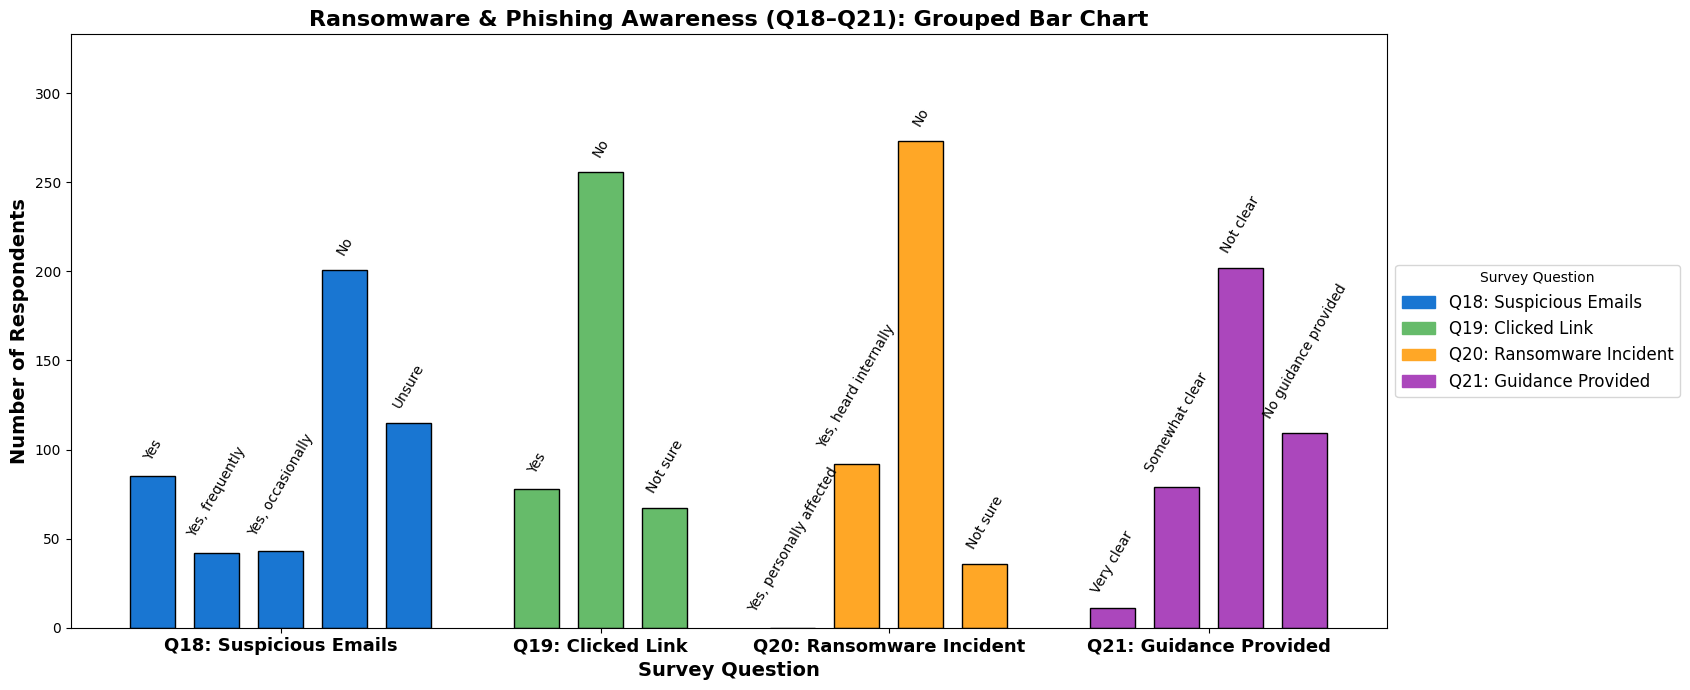

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

# Data setup
question_labels = [
    "Q18: Suspicious Emails",
    "Q19: Clicked Link",
    "Q20: Ransomware Incident",
    "Q21: Guidance Provided"
]
response_labels = [
    ["Yes", "Yes, frequently", "Yes, occasionally", "No", "Unsure"],      # Q18
    ["Yes", "No", "Not sure"],                                            # Q19
    ["Yes, personally affected", "Yes, heard internally", "No", "Not sure"], # Q20
    ["Very clear", "Somewhat clear", "Not clear", "No guidance provided"]    # Q21
]
counts = [
    [85, 42, 43, 201, 115],      # Q18
    [78, 256, 67],               # Q19
    [0, 92, 273, 36],            # Q20
    [11, 79, 202, 109]           # Q21
]
colours = ['#1976D2', '#66BB6A', '#FFA726', '#AB47BC']

# Calculate total number of bars and their positions
bar_positions = []
bar_labels = []
bar_heights = []
bar_colours = []
group_centers = []
curr_pos = 0

for q_idx, (q, resp, cnt, colour) in enumerate(zip(question_labels, response_labels, counts, colours)):
    n = len(resp)
    positions = np.arange(curr_pos, curr_pos + n)
    bar_positions.extend(positions)
    bar_labels.extend(resp)
    bar_heights.extend(cnt)
    bar_colours.extend([colour]*n)
    group_centers.append(np.mean(positions))
    curr_pos += n + 1  # Space between groups

plt.figure(figsize=(17, 7))
bars = plt.bar(bar_positions, bar_heights, color=bar_colours, width=0.7, edgecolor='black')

# Add response labels above each bar
for pos, height, label in zip(bar_positions, bar_heights, bar_labels):
    plt.text(pos, height + 7, label, ha='center', va='bottom', fontsize=10, rotation=60, color='black')

# Add question labels under each group
plt.xticks(group_centers, question_labels, fontsize=13, weight='bold')

plt.xlabel("Survey Question", fontsize=14, weight='bold')
plt.ylabel("Number of Respondents", fontsize=14, weight='bold')
plt.title("Ransomware & Phishing Awareness (Q18–Q21): Grouped Bar Chart", fontsize=16, weight='bold')
plt.ylim(0, max(bar_heights) + 60)

# Side legend
from matplotlib.patches import Patch
legend_patches = [Patch(color=col, label=question_labels[i]) for i, col in enumerate(colours)]
plt.legend(handles=legend_patches, title="Survey Question", fontsize=12, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()


In [ ]:

# Data (fill NaN with 0)
data = [
    [85, 42, 43, 201, 115],           # Q18
    [78, 256, 67, 0, 0],              # Q19
    [0, 92, 273, 36, 0],              # Q20
    [11, 79, 202, 109, 0],            # Q21
]
row_labels = [
    "Received suspicious emails (Q18)",
    "Clicked suspicious link (Q19)",
    "Experienced ransomware incident (Q20)",
    "Guidance on suspicious emails (Q21)"
]
col_labels = ["Yes", "Yes, frequently", "Yes, occasionally", "No", "Unsure"]

df = pd.DataFrame(data, index=row_labels, columns=col_labels)

# Custom high-contrast green colo


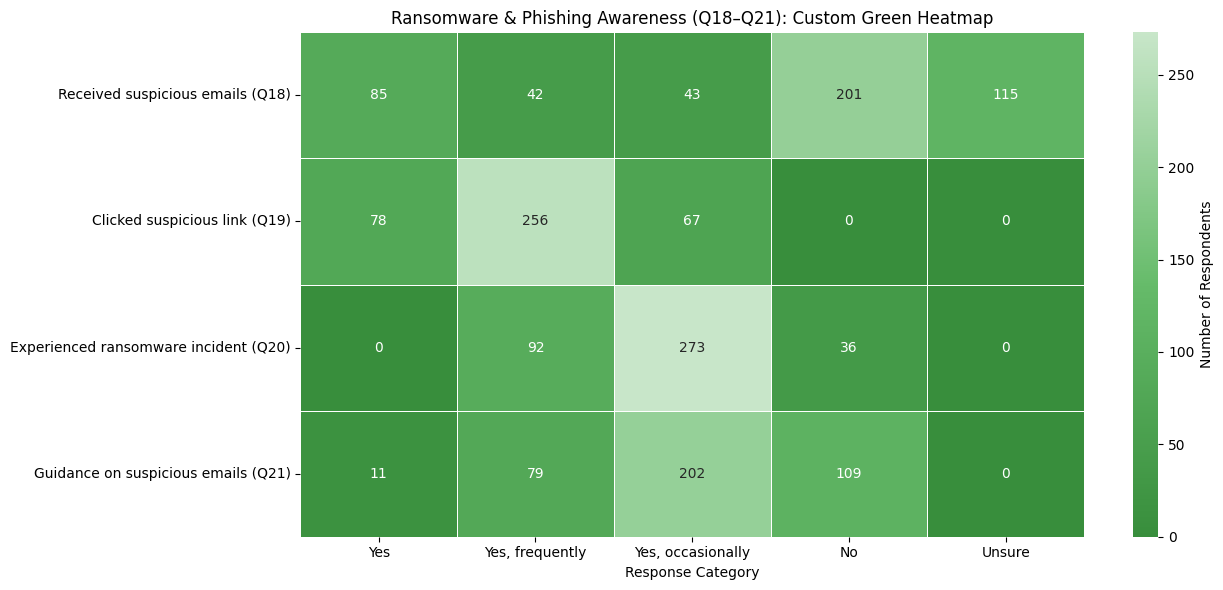

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Data setup, filling np.nan with 0
data = [
    [85, 42, 43, 201, 115],           # Q18
    [78, 256, 67, 0, 0],              # Q19
    [0, 92, 273, 36, 0],              # Q20
    [11, 79, 202, 109, 0],            # Q21
]

row_labels = [
    "Received suspicious emails (Q18)",
    "Clicked suspicious link (Q19)",
    "Experienced ransomware incident (Q20)",
    "Guidance on suspicious emails (Q21)"
]

col_labels = ["Yes", "Yes, frequently", "Yes, occasionally", "No", "Unsure"]

df = pd.DataFrame(data, index=row_labels, columns=col_labels)

# Create a custom colormap that starts at a medium green (not white)
greens_custom = LinearSegmentedColormap.from_list(
    "greens_custom",
    ["#388E3C", "#66BB6A", "#C8E6C9"]  # deep green to light green, but no white
)

plt.figure(figsize=(13, 6))
sns.heatmap(
    df,
    annot=True,
    fmt='.0f',
    cmap=greens_custom,
    linewidths=.5,
    cbar_kws={"label": "Number of Respondents"},
    yticklabels=row_labels,
    xticklabels=col_labels,
    vmin=0,  # minimum value is now a light green, not white
    vmax=df.to_numpy().max()
)
plt.title("Ransomware & Phishing Awareness (Q18–Q21): Custom Green Heatmap")
plt.ylabel("")
plt.xlabel("Response Category")
plt.tight_layout()
plt.show()


Phishing exposure remains high: Many staff have encountered suspicious emails, and some are frequent targets.
Human error persists: A substantial number have clicked or are unsure if they have, indicating ongoing need for awareness and training.
 Communication and transparency around incidents can improve: While some are aware of ransomware cases, direct impact is rarely acknowledged.
Policy and process clarity is lacking: The majority of staff do not perceive the guidance as clear; this is a critical gap


# Section 6 – Real-World Case Awareness
#Q23, Q24, Q25.

Q23

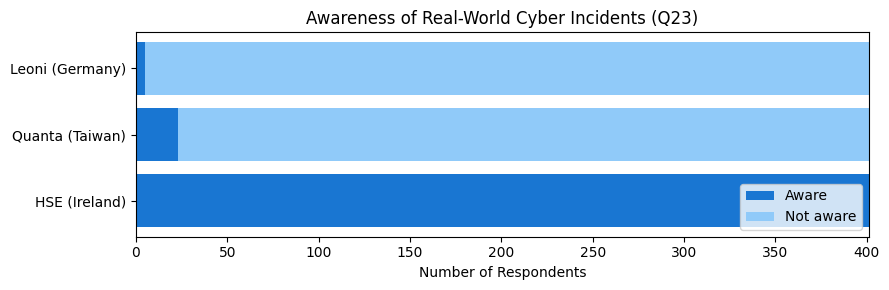

In [ ]:
#import matplotlib.pyplot as plt

# Data for Q23 Awareness
cases = ['HSE (Ireland)', 'Quanta (Taiwan)', 'Leoni (Germany)']
aware = [401, 23, 5]
not_aware = [0, 378, 396]

fig, ax = plt.subplots(figsize=(9, 3))
ax.barh(cases, aware, color='#1976D2', label='Aware')
ax.barh(cases, not_aware, left=aware, color='#90CAF9', label='Not aware')
ax.set_xlabel('Number of Respondents')
ax.set_title('Awareness of Real-World Cyber Incidents (Q23)')
ax.legend(loc='lower right')
plt.tight_layout()
plt.show()


Q24

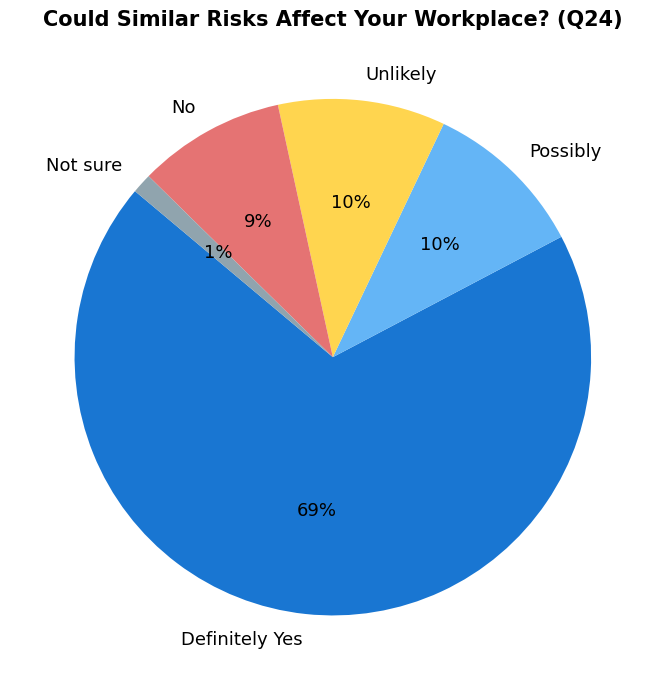

In [ ]:
#import matplotlib.pyplot as plt

labels = ["Definitely Yes", "Possibly", "Unlikely", "No", "Not sure"]
sizes = [276, 41, 42, 37, 5]
colours = ['#1976D2', '#64B5F6', '#FFD54F', '#E57373', '#90A4AE']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=140, colors=colours, textprops={'fontsize': 13})
plt.title('Could Similar Risks Affect Your Workplace? (Q24)', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()


Q25

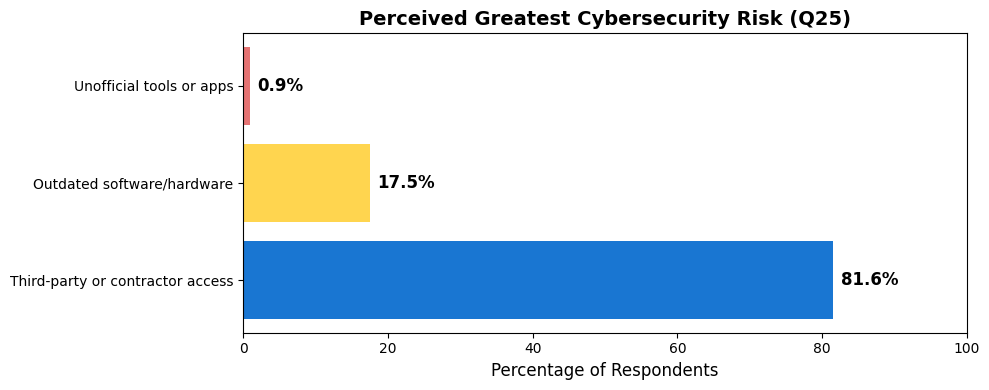

In [ ]:
#import matplotlib.pyplot as plt

risks = [
    "Third-party or contractor access",
    "Outdated software/hardware",
    "Unofficial tools or apps"
]
counts = [270, 58, 3]
percentages = [c / sum(counts) * 100 for c in counts]
colours = ['#1976D2', '#FFD54F', '#E57373']

plt.figure(figsize=(10, 4))
bars = plt.barh(risks, percentages, color=colours)
plt.xlabel("Percentage of Respondents", fontsize=12)
plt.title("Perceived Greatest Cybersecurity Risk (Q25)", fontsize=14, weight='bold')

# Annotate each bar with the percentage
for bar, pct in zip(bars, percentages):
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2,
             f"{pct:.1f}%", va='center', fontsize=12, weight='bold')
plt.xlim(0, 100)
plt.tight_layout()
plt.show()


1. High Awareness of Local Incidents
Nearly all staff are aware of the 2021 HSE (Ireland) ransomware attack.

2. Strong Recognition of Organisational Risk
Over 80% (“Definitely” or “Possibly”) believe that similar cyber risks could affect their
3. Third-Party/Contractor Access is the Dominant Concern

4. Actionable Gaps
Low awareness of non-local incidents suggests a need to broaden education to include international case studies.


# Section 7 – Data Protection and GDPR
#Q26, Q27, Q28, Q29, Q30, Q31

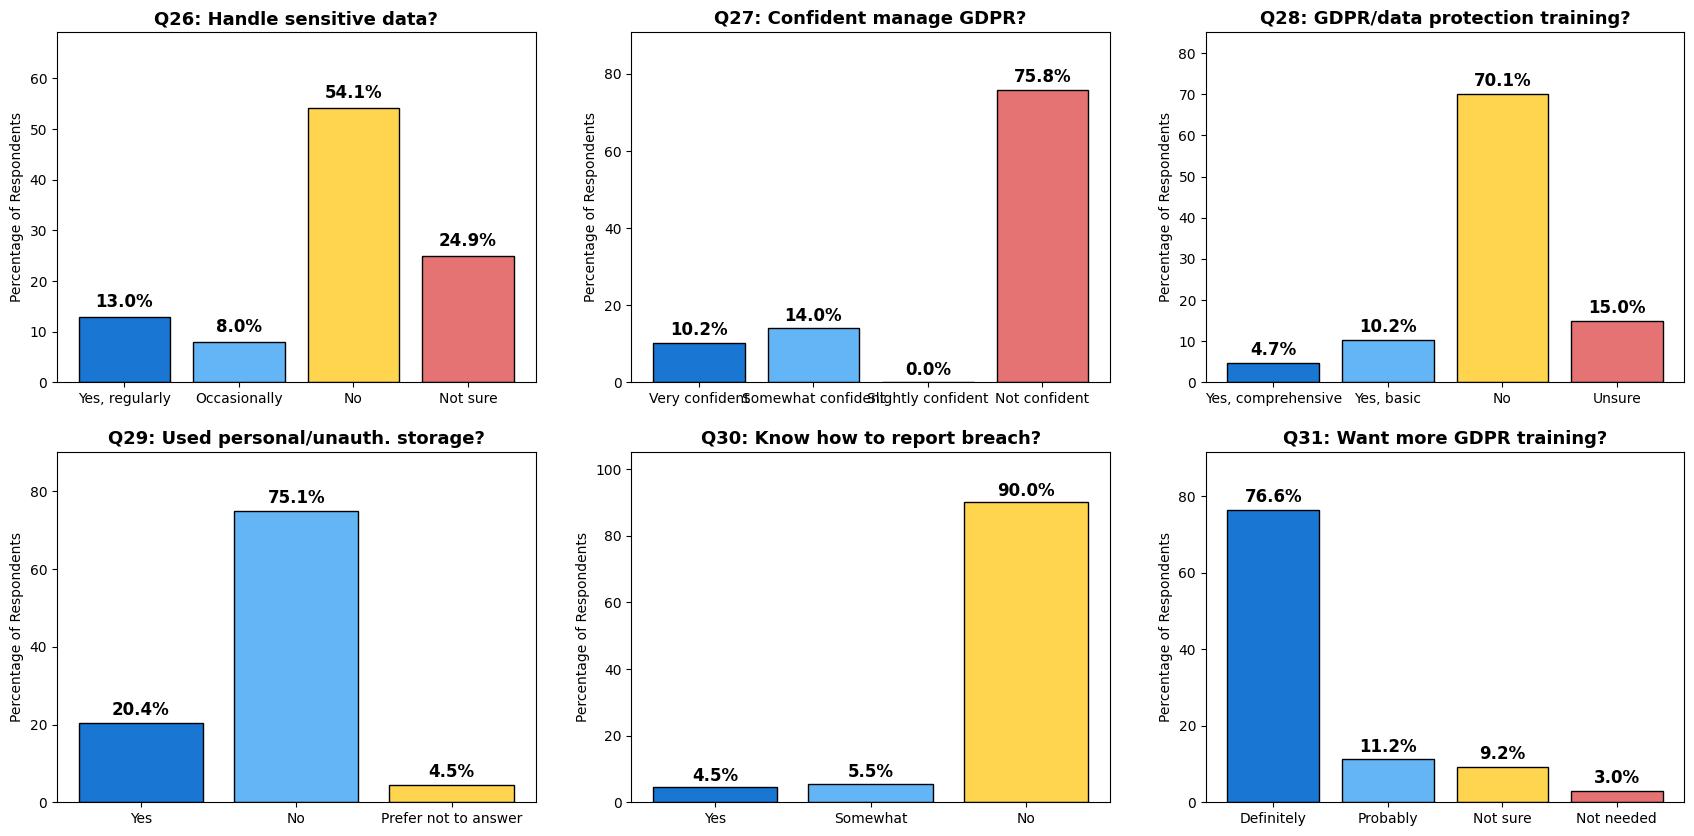

In [ ]:
import matplotlib.pyplot as plt

# Data
questions = [
    "Q26: Handle sensitive data?",
    "Q27: Confident manage GDPR?",
    "Q28: GDPR/data protection training?",
    "Q29: Used personal/unauth. storage?",
    "Q30: Know how to report breach?",
    "Q31: Want more GDPR training?"
]

responses = [
    ["Yes, regularly", "Occasionally", "No", "Not sure"],          # Q26
    ["Very confident", "Somewhat confident", "Slightly confident", "Not confident"], # Q27
    ["Yes, comprehensive", "Yes, basic", "No", "Unsure"],          # Q28
    ["Yes", "No", "Prefer not to answer"],                         # Q29
    ["Yes", "Somewhat", "No"],                                     # Q30
    ["Definitely", "Probably", "Not sure", "Not needed"]           # Q31
]

counts = [
    [52, 32, 217, 100],      # Q26
    [41, 56, 0, 304],        # Q27
    [19, 41, 281, 60],       # Q28
    [82, 301, 18],           # Q29
    [18, 22, 361],           # Q30
    [307, 45, 37, 12]        # Q31
]

colours = [
    '#1976D2', '#64B5F6', '#FFD54F', '#E57373', '#66BB6A', '#AB47BC'
]

fig, axes = plt.subplots(2, 3, figsize=(21, 10))
axes = axes.flatten()

for idx, (ax, q, resp, cnt) in enumerate(zip(axes, questions, responses, counts)):
    total = sum(cnt)
    percentages = [c/total*100 for c in cnt]
    bars = ax.bar(resp, percentages, color=colours[:len(resp)], edgecolor='black')
    for bar, pct in zip(bars, percentages):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, f"{pct:.1f}%",
                ha='center', fontsize=12, weight='bold')
    ax.set_title(q, fontsize=13, weight='bold')
    ax.set_ylabel("Percentage of Respondents")
    ax.set_ylim(0, max(percentages)+15)
    ax.set_xticklabels


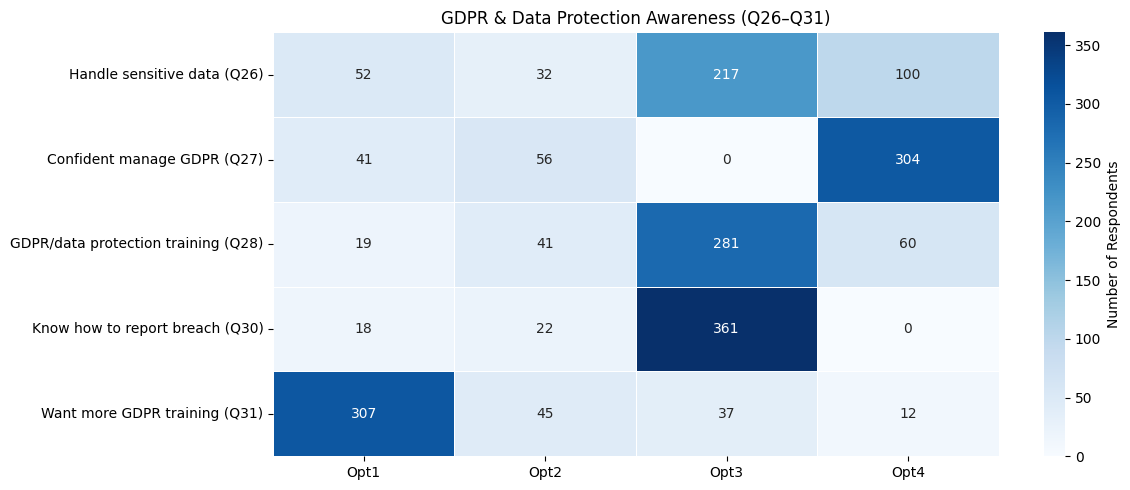

In [ ]:
#import pandas as pd
#import numpy as np
#import seaborn as sns

heatmap_data = [
    [52, 32, 217, 100],      # Q26
    [41, 56, 0, 304],        # Q27
    [19, 41, 281, 60],       # Q28
    [18, 22, 361, 0],        # Q30 (pad with 0)
    [307, 45, 37, 12]        # Q31
]
row_labels = [
    "Handle sensitive data (Q26)",
    "Confident manage GDPR (Q27)",
    "GDPR/data protection training (Q28)",
    "Know how to report breach (Q30)",
    "Want more GDPR training (Q31)"
]
col_labels = ["Opt1", "Opt2", "Opt3", "Opt4"]

df = pd.DataFrame(heatmap_data, index=row_labels, columns=col_labels)
plt.figure(figsize=(12, 5))
sns.heatmap(
    df,
    annot=True,
    fmt='.0f',
    cmap="Blues",
    linewidths=.5,
    cbar_kws={"label": "Number of Respondents"},
    yticklabels=row_labels
)
plt.title("GDPR & Data Protection Awareness (Q26–Q31)")
plt.tight_layout()
plt.show()


Handling of Personal or Sensitive Data, many staff are either not exposed to or unaware of handling sensitive data, suggesting a need for clearer definitions and data mapping.

Confidence in Managing Data According to GDPR, there is a widespread lack of confidence in GDPR compliance, significantly increasing organisational risk.
Received Data Protection/GDPR Training; the workforce is under-trained in data protection obligations.

Use of Personal/Unauthorised Storage for Sensitive Data, Shadow IT and risky data handling practices persist, with potential non-compliance and data breach risks.

Knowledge of How to Report a Data Breach, this is a major gap in incident response readiness—urgent process and awareness improvements needed.
Demand for Additional Data Protection/GDPR Training

Implication: Staff are open to further education—there is demand for targeted, practical training.

Overall Low confidence and awareness around GDPR responsibilities and incident reporting.


#Section 8 – Support, Culture & Improvement
#Q32, Q33, Q34, Q35.

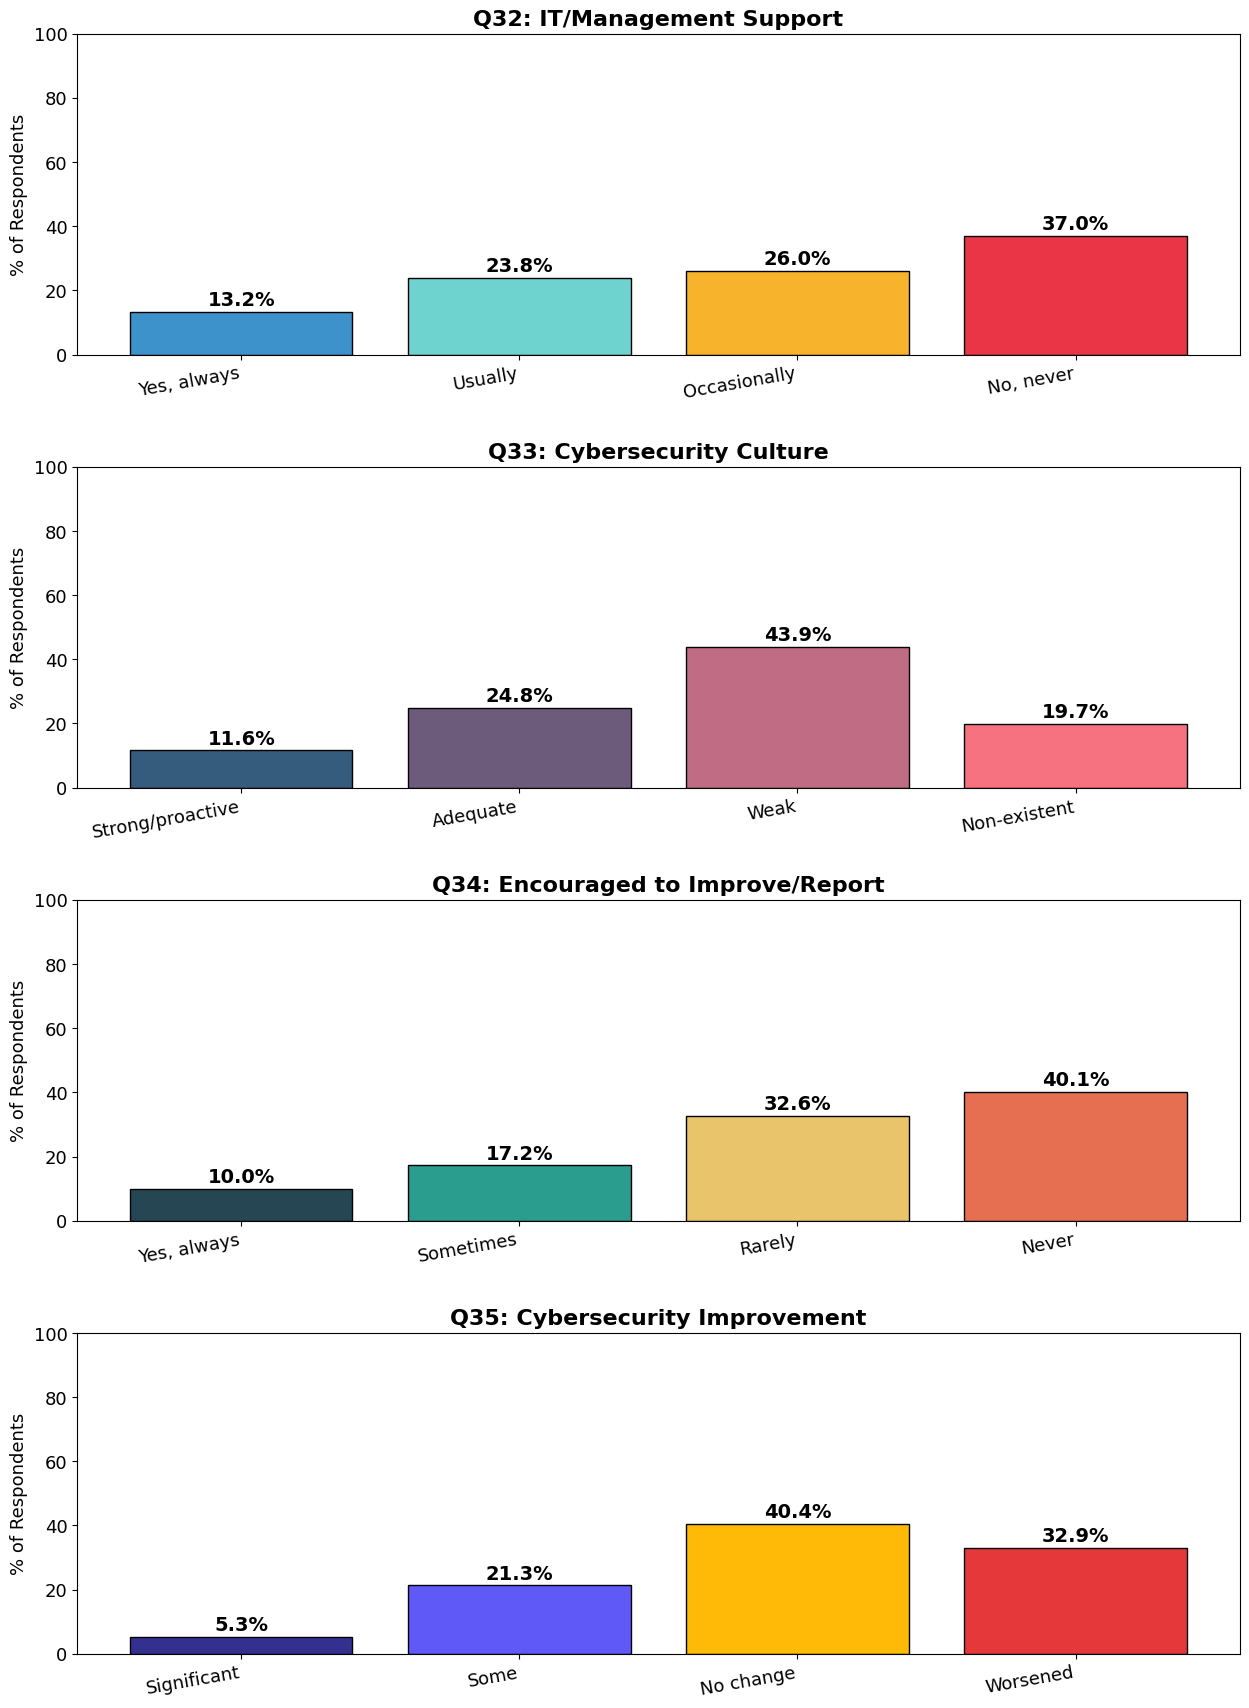

In [ ]:
#import matplotlib.pyplot as plt

# Section 8 Questions
questions = [
    "Q32: IT/Management Support",
    "Q33: Cybersecurity Culture",
    "Q34: Encouraged to Improve/Report",
    "Q35: Cybersecurity Improvement"
]

# Response options
responses = [
    ["Yes, always", "Usually", "Occasionally", "No, never"],       # Q32
    ["Strong/proactive", "Adequate", "Weak", "Non-existent"],      # Q33
    ["Yes, always", "Sometimes", "Rarely", "Never"],               # Q34
    ["Significant", "Some", "No change", "Worsened"]               # Q35
]

# Raw response counts
counts = [
    [42, 76, 83, 118],      # Q32
    [37, 79, 140, 63],      # Q33
    [32, 55, 104, 128],     # Q34
    [17, 68, 129, 105]      # Q35
]

# Custom colour palette for each subplot
colour_sets = [
    ['#3e92cc', '#6ed3cf', '#f7b32b', '#ea3546'],   # Q32: blue, teal, yellow, red
    ['#355c7d', '#6c5b7b', '#c06c84', '#f67280'],   # Q33: blue-violet, purple, rose, pink
    ['#264653', '#2a9d8f', '#e9c46a', '#e76f51'],   # Q34: navy, green, gold, orange
    ['#343090', '#5f59f7', '#ffba08', '#e5383b']    # Q35: dark blue, indigo, gold, red
]

# Create 4 stacked subplots for clarity
fig, axes = plt.subplots(4, 1, figsize=(15, 18))  # 4 tall charts stacked

for idx, (ax, q, resp, cnt, colours) in enumerate(zip(axes, questions, responses, counts, colour_sets)):
    total = sum(cnt)
    percentages = [c / total * 100 for c in cnt]
    bar_locations = range(len(resp))
    bars = ax.bar(bar_locations, percentages, color=colours, edgecolor='black')
    for x, bar, pct in zip(bar_locations, bars, percentages):
        ax.text(x, bar.get_height() + 2, f"{pct:.1f}%",
                ha='center', fontsize=14, weight='bold')
    ax.set_title(q, fontsize=16, weight='bold')
    ax.set_ylabel("% of Respondents", fontsize=13)
    ax.set_ylim(0, 100)
    ax.set_xticks(bar_locations)  # Explicitly set tick locations
    ax.set_xticklabels(resp, rotation=10, ha='right', fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=13)

plt.subplots_adjust(hspace=0.35, top=0.95, bottom=0.05)
plt.show()


Perceived Support by IT/Management
There is a notable lack of perceived support from IT and management on cybersecurity issues. This could undermine security policy adoption and reporting.

Perceived Cybersecurity Culture
The overall workplace cybersecurity culture is weak, with most staff perceiving significant room for improvement.

Encouragement to Suggest or Report Security Improvements
Staff do not feel empowered to participate in security improvements or raise issues, which may result in underreporting and missed opportunities for improvement.

Perception of Recent Cybersecurity Improvements
Most employees see little or negative progress on cybersecurity. This could indicate a gap between management’s intentions and frontline experience.

Perceived support, culture, and improvement efforts are weak.
Most staff do not feel included or encouraged to participate in cybersecurity activities.
There is a risk of low engagement, policy fatigue, and poor reporting of incidents or suggestions.


# Conclusion:

---



The Employee Technology Usage & Cybersecurity Awareness Survey provides a comprehensive snapshot of the organisation’s digital culture, security posture, and staff awareness levels. The results highlight several strengths and significant areas requiring urgent attention.
1. Awareness of Local Threats is High, but Broader Risk Perception is Limited
2. Significant Gaps in Training, Confidence, and Compliance
3. Organisational Culture and Support are Weak
4. High-Risk Practices and Process Gaps Persist
5. Key Risks Identified by Staff Align with Industry Trends


## Overall Observations

---

The survey reveals that employees are highly aware of major national cyber incidents, such as the HSE ransomware attack, but exhibit limited awareness of international or supply chain-related threats, highlighting the need to broaden staff education to encompass the full spectrum of organisational risks. There are significant training and knowledge gaps, with most staff lacking formal cybersecurity and data protection training, and many expressing a lack of confidence in identifying threats, handling data in compliance with GDPR, or reporting incidents. Encouragingly, there is a clear appetite for further education, as a large proportion of respondents request additional training. The prevailing cybersecurity culture within the organisation is weak, with few employees feeling supported by IT or management and limited encouragement to suggest improvements or report concerns, creating an environment where risks may go unreported and opportunities for improvement are missed. Risky practices, such as the use of personal email or unauthorised cloud storage for sensitive data, remain prevalent, and only a small minority know how to report a data breach an indication of critical process gaps that could hinder effective incident response. Staff overwhelmingly identify third-party and contractor access as the greatest cybersecurity risk, which aligns with industry trends and underscores the importance of robust supply chain risk management. Despite these challenges, employees demonstrate a strong willingness to engage and improve, with most expressing a desire for further training and greater clarity in security processes.